## Projet M1 ML: inpainting

#### Binôme: Yuhan WANG et Tianyu WANG

### données USPS
USPS est une base de données de classification de chiffres(0-9) manuscrits.USPS_train.txt a 7291 exemplaires et 2007 test images. The images are 16*16 grayscale pixels. Chaque image est en taille 16*16, donc en total 256 parametres x et a un attribut y qui represente auquelle classe qu'elle appartient.

In [1]:
import numpy as np
import sklearn
from fonctions import *

In [2]:
X,Y=load_usps('USPS_train.txt')
x,y=load_usps('USPS_test.txt')

### Préambule: régression linéaire, régression ridge et LASSO
Dans la régression linéaire, on utilise $Mse(f_w,E)=||Xw-y||^2_2$ sous l'expression de matrice. Pour minimiser la fonction d'erreur, il faut faire la dérivation:  
    $\frac {\partial Mse(f_w , E)}{\partial w}=0-2X^Ty+2X^TXw=0 $  
    $X^TXw=2X^Ty$  
    Pour que la partie gauche ne contient que w, il faut la multiple avec $X^TX^{-1}$, qui n'existe que pour $X^TX$ invertible (qui veut dire notre probleme n'a pas de **multicolinéarité**), qui est presque impossible dans le cas réel. Régression ridge et Lasso sont crée pour résoudre le probleme en cas de multicolinéarité.

In [3]:
train_X,train_Y=X[(Y==3)|(Y==8)],Y[(Y==3)|(Y==8)]
test_x,test_y=x[(y==3)|(y==8)],y[(y==3)|(y==8)]
train_Y=np.array(np.where(train_Y==3,-1,1))
test_y=np.array(np.where(test_y==3,-1,1))

In [4]:
from sklearn import linear_model
from sklearn.metrics import r2_score
#regression lineaire:
reg=linear_model.LinearRegression()
reg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print(reg.score(test_x,test_y))

0.7433552383309949


### Ridge
$L_2(f_w,E)= Mse(f_w , E)+\alpha||w||^2$ où $||w||^2 = \sqrt{\sum_{i=0}^n w_i}$  
Si on reprend la dérivation:  
    $\frac{\partial L_2(f_w,E)}{\partial w}= \frac{\partial Mse(f_w , E)}{\partial w}+\frac{\partial \alpha||w||^2}{\partial w}$  
    $\frac{\partial L_2(f_w,E)}{\partial w}= X^TXw+\alpha w-X^Ty$=$(X^TX+\alpha I)w-X^Ty$ où I est **matrice identité**.  
    la dérivation=0 => $(X^TX+\alpha I)w=X^Ty$  
    On ajoute certains chiffres dans la diagonale de matrice $X^TX$ donc théoriquement, il est moins possible d'être **multicolinéarité**, et on peut le résoudre avec la régression.    
### Lasso
$L_3(f_w,E)= Mse(f_w , E)+\alpha||w||$ où $||w|| = \sum_{i=0}^n |w_i|$  
$\frac{\partial L_3(f_w,E)}{\partial w}= \frac{\partial Mse(f_w , E)}{\partial w}+\frac{\partial \alpha||w||}{\partial w}$  
$\frac{\partial L_2(f_w,E)}{\partial w}= X^TXw+\frac{\alpha I}{2}-X^Ty$ si $||w||>0$, sinon $X^TXw-\frac{\alpha I}{2}-X^Ty$  
Donc alpha dans l'algorithme Lasso peut être **négative**. En comparant avec Ridge, Lasso ne peut pas résoudre la multicolinéarité, mais il est utile dans la section de **contraction des coefficients**.


### Ridge vs linéaire

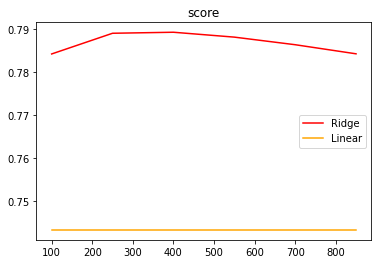

In [6]:
alpharange=np.arange(100,1000,150)
ridges,lrs=[],[]
varR,varLR=[],[]
for alpha in alpharange:
    ridge=linear_model.Ridge(alpha=alpha).fit(train_X,train_Y)
    linear=linear_model.LinearRegression().fit(train_X,train_Y)
    ridges.append(ridge.score(test_x,test_y))
    lrs.append(linear.score(test_x,test_y))
plt.plot(alpharange,ridges,color='red',label='Ridge')
plt.plot(alpharange,lrs,color='orange',label='Linear')
plt.title('score')
plt.legend()
plt.show()

### Ridge vs lasso

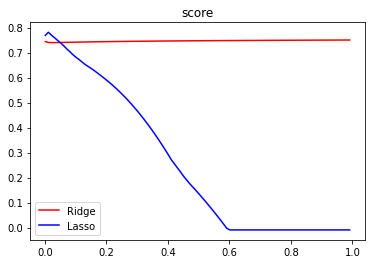

In [7]:
alpharange=np.arange(0.001,1,0.01)
ridges,lrs=[],[]
len_nonnul=[]
for alpha in alpharange:
    ridge=linear_model.Ridge(alpha=alpha).fit(train_X,train_Y)
    lasso=linear_model.Lasso(alpha=alpha).fit(train_X,train_Y)
    ridges.append(ridge.score(test_x,test_y))
    lrs.append(lasso.score(test_x,test_y))
    coef=lasso.coef_
    len_nonnul.append(len(coef[coef!=0]))
plt.plot(alpharange,ridges,color='red',label='Ridge')
plt.plot(alpharange,lrs,color='blue',label='Lasso')
plt.title('score')
plt.legend()
plt.show()

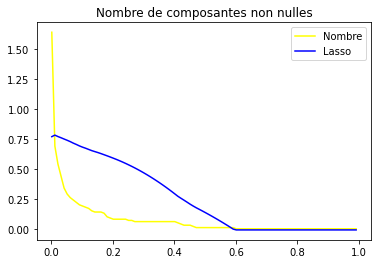

In [8]:
plt.plot(alpharange,np.array(len_nonnul)*0.01,color='yellow',label='Nombre')
plt.plot(alpharange,lrs,color='blue',label='Lasso')
plt.title('Nombre de composantes non nulles')
plt.legend()
plt.show()

### Conclusion Q1.1

### Partie II: Lasso et inpainting
De manière générale en inpainting, une hypothèse fondamentale est qu’une image a une cohérence spatiale et de texture

### Q2.2 L'image bruité
la fonction débruiter prend un patch, un dictionnaire en entrée et rend le lasso entrainé par cet ensemple. La fonction est utilisée dans la fonction inpainting(img,h) qui prend une image bruité et la taille h du patch, retourne l'image complète.

In [9]:
from matplotlib import colors
#from fonctions import *
from warnings import filterwarnings
filterwarnings('ignore')

In [10]:
data=read_im("Lenna.jpg")
#data=colors.rgb_to_hsv(data)

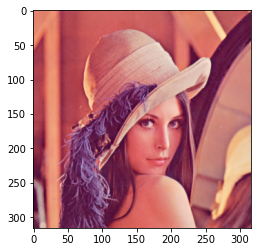

In [11]:
plt.imshow(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


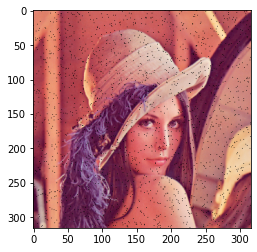

In [12]:
data_noise=bruiter(data,0.02)
plt.imshow(data_noise)

In [13]:
tmp=inpainting(data_noise,7)

1255
770
1255


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


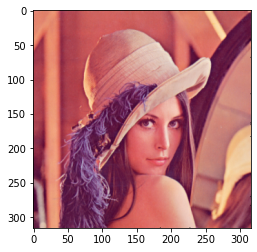

In [14]:
plt.imshow(tmp)

### Q2.3 Une partie de l'image est manquante

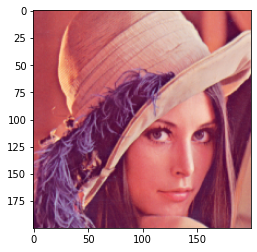

In [15]:
test=data[50:250,50:250]
plt.imshow(test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


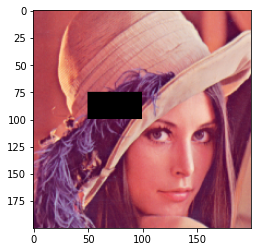

In [16]:
data_rect,C=delete_rect2(test,75,50,25,50)
plt.imshow(data_rect)

In [17]:
tmp2,C2,patch2=filling(data_rect,5,C,10,10,10,20)

[0.   0.2  0.36 0.4  0.52 0.6  0.64 0.68 0.76 0.8  0.84 0.88 0.92 0.96
 1.  ]
cpt 0


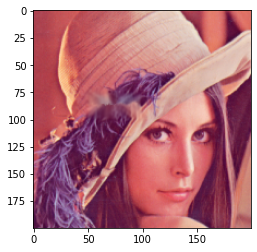

In [18]:
plt.imshow(tmp2)